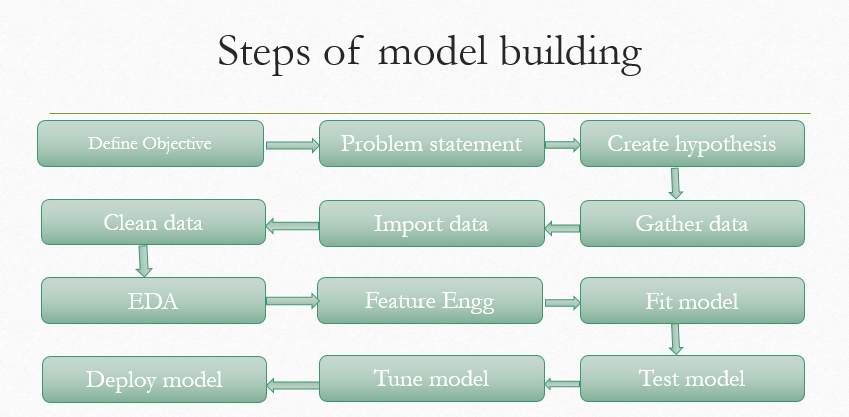

In [1]:
#Topic of Discussion
from IPython.display import Image
Image(filename='Steps.png') 

In [37]:
####################Setting working directory############################
import os
os.chdir("C:\\Users\\User\\Desktop")

In [38]:
################################Step 1 - Import data############################################
import pandas as pd
MyData = pd.read_csv("SG/Income_Expense_Data.csv")

In [39]:
#Checking Size of data
MyData.shape

(17, 3)

In [40]:
#Checking first few records
#MyData.head(10)

In [41]:
################Step 2-Data Cleaning#######################
#Check for missing values
MyData.isnull().sum() 

Age        0
Income     0
Expense    0
dtype: int64

In [42]:
#Treating null value-replacing null value with median
MyData["Income"].fillna((MyData["Income"].median()), inplace = True)

In [43]:
#Check for missing values - Again
MyData.isnull().sum() 

Age        0
Income     0
Expense    0
dtype: int64

In [44]:
#Checking for outliers
MyData.describe()  #notice the maximum value in Age

,Age,Income,Expense
count,17.000000,17.000000,17.000000
mean,51.117647,32751.764706,21705.882353
std,50.362290,8385.789919,8206.435781
min,21.000000,20778.000000,12000.000000
25%,27.000000,25730.000000,15000.000000
50%,32.000000,33410.000000,20000.000000
75%,56.000000,40286.000000,25000.000000
max,225.000000,47165.000000,40000.000000


In [45]:
#Checking different percentiles
pd.DataFrame(MyData['Age']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Age
count,17.000000
mean,51.117647
std,50.362290
min,21.000000
1%,21.320000
10%,24.200000
30%,27.800000
50%,32.000000
75%,56.000000
90%,90.400000


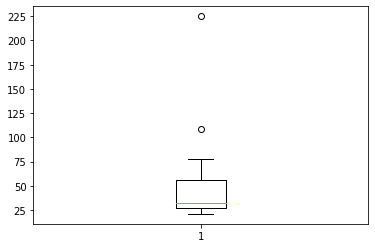

In [46]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(MyData['Age'])
plt.show()

In [47]:
#Checking Outlier by definition and treating outliers

#getting median Age
Age_col_df = pd.DataFrame(MyData['Age'])
Age_median = Age_col_df.median()

#getting IQR of Age column
Q3 = Age_col_df.quantile(q=0.75)
Q1 = Age_col_df.quantile(q=0.25)
IQR = Q3-Q1

#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

#Finding and treating outliers - both lower and upper end
MyData.loc[MyData['Age']>IQR_UL , 'Age'] = int(Age_col_df.quantile(q=0.90))
MyData.loc[MyData['Age']<IQR_LL , 'Age'] = int(Age_col_df.quantile(q=0.01))

In [48]:
#Check max age value now
max(MyData['Age'])

90

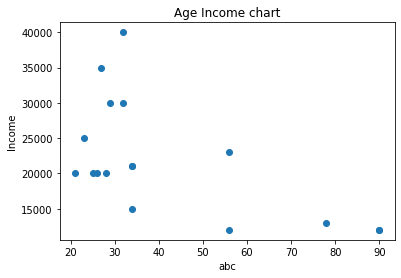

In [49]:
#Check how Expense is varying with Age
x = MyData["Age"]
y=  MyData["Expense"]
plt.scatter(x, y)
plt.title('Age Income chart')
plt.xlabel('abc')
plt.ylabel('Income')
plt.show()

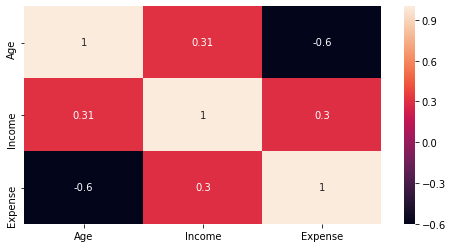

In [50]:
#check correltion matrix - to check the strength of variation bwtween two variables
correlation_matrix= MyData.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True)
fgr.savefig("myimage.png")

In [51]:
correlation_matrix.to_csv("myfile1802.csv")

# What is feature engineering?

#Its playing around with features to acheive below goals.


#Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
#Improving the performance of machine learning models.

In [52]:
################Step 4-feature engineering#######################
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MyData)
scaled_data

array([[0.05797101, 0.2898018 , 0.28571429],
       [0.07246377, 0.05275325, 0.28571429],
       [0.08695652, 0.76094289, 0.82142857],
       [0.10144928, 0.17842119, 0.28571429],
       [0.11594203, 0.53158752, 0.64285714],
       [0.02898551, 0.47872058, 0.46428571],
       [0.15942029, 0.53681737, 0.64285714],
       [1.        , 0.67571152, 0.        ],
       [1.        , 0.73930344, 0.        ],
       [0.1884058 , 0.88536022, 0.32142857],
       [0.50724638, 0.31758063, 0.        ],
       [0.82608696, 0.80797362, 0.03571429],
       [0.        , 0.18766817, 0.28571429],
       [0.1884058 , 0.19100315, 0.32142857],
       [0.50724638, 0.        , 0.39285714],
       [0.15942029, 1.        , 1.        ],
       [0.1884058 , 0.08053208, 0.10714286]])

In [53]:
#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = MyData.columns

In [54]:
#Separating features and response
features = ["Income","Age"]
response = ["Expense"]
X=MyData_scaled[features]
y=MyData_scaled[response]

In [55]:
#X

In [56]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
#Fitting lineaar regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#Checking accuracy on test data
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

53.64011315093615 %


In [59]:


y_pred = model.predict(X_test)

metrics.r2_score(y_pred,y_test)

-0.9291485172183633

In [33]:
X_test #the test data - predictors

,Income,Age
1,0.052753,0.072464
6,0.536817,0.159420
8,0.739303,1.000000
9,0.885360,0.188406


In [35]:
y_test #the actual values in test data - target column

,Expense
1,0.285714
6,0.642857
8,0.000000
9,0.321429


In [60]:
y_pred

array([[0.2961481 ],
       [0.47122559]])

In [61]:
model.predict(X_test) #predcited values on test data

array([[0.2961481 ],
       [0.47122559]])

In [62]:
model.intercept_ #checking the intercept of model equation

array([0.31784557])

In [63]:
model.coef_ #Checking the coefficients of model equation

array([[ 0.47797879, -0.64739125]])

In [ ]:
#Creating the model equation - manually
#Expense  = (0.0.47797879*Income - -0.64739125*Age) + 0.31784557

#Substituting one value and matching result - manually
#Expense = (0.59063665*0.381818 - 0.31855265*0.263736) + 0.06094365 = 0.2024

#Substituting original value and matching result - manually
#Expense = (0.59063665*0.381818 - 0.31855265*0.263736) + 0.06094365 = 15000 approx


In [68]:
import numpy as np
json={'Income':50000, 'Age':30}
data = json.
prediction = model.predict([np.array(list(data.values()))])

output = prediction[0]
#jsonify(output)
prediction

array([[23879.83578595]])

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[24, 30000]]))